<a href="https://colab.research.google.com/github/UNB-TME-6017-W24/assignment-1-darthvader998/blob/main/3721371_Purushotham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




1. **tf.keras.layers.Conv2D:**
This layer is designed to process spatial data, particularly in the context of image processing and feature extraction within Convolutional Neural Networks (CNNs). Its function involves convolving input data with a series of filters, effectively capturing spatial hierarchies and patterns.
   - **Options:**
     - `filters`: Number of filters/kernels to apply.
     - `kernel_size`: Size of the convolutional kernel.
     - `strides`: Step size for kernel movement.
     - `padding`: 'valid' or 'same', determines how to handle borders.
     - `activation`: Activation function applied to the output.

   ```python
   model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
   ```

2. **tf.keras.layers.MaxPooling2D:**
This layer is employed for downsampling spatial dimensions, specifically through the technique of max pooling. Its role is to decrease the spatial dimensions of the input, emphasizing the retention of the most crucial features.
   - **Options:**
     - `pool_size`: Size of the pooling window.
     - `strides`: Step size for pooling.
     - `padding`: 'valid' or 'same', similar to Conv2D.
   
   ```python
   model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
   ```

3. **tf.keras.layers.Dropout:**
This layer, known as dropout, serves as a regularization technique by randomly setting a fraction of input units to zero during training. Its purpose is to mitigate overfitting by decreasing dependence on specific neurons, promoting a more robust model.
   - **Options:**
     - `rate`: Fraction of input units to drop during training.
     - `noise_shape`: Shape of binary dropout mask.

   ```python
   model.add(tf.keras.layers.Dropout(rate=0.25))
   ```

4. **tf.keras.layers.Flatten:**
This layer is responsible for transforming input into a 1D array, effectively collapsing spatial dimensions. It is commonly employed to facilitate the transition from convolutional or pooling layers to densely connected layers in neural networks.
   - **Options:**
     - `data_format`: Defines input dimension order: channels_last (default) or channels_first.

   ```python
   model.add(tf.keras.layers.Flatten())
   ```

5. **tf.keras.layers.Dense:**
This type of layer is referred to as a fully connected dense layer. In this configuration, every neuron from the preceding layer establishes connections with each neuron in the current layer, creating an extensive network of interconnections.
   - **Options:**
     - `units`: Number of neurons in the layer.
     - `activation`: Activation function applied to the output.
     - `use_bias`: Whether to use bias term.

   ```python
   model.add(tf.keras.layers.Dense(units=128, activation='relu', use_bias=True))
   ```
   


2. Setup and Load the MNIST Dataset

Import the necessary libraries from TensorFlow and Keras.

Load the MNIST dataset and split it into training and testing sets.

Normalize the pixel values of the images to the range [0, 1].

Convert the class vectors to binary class matrices (one-hot encoding).






In [ ]:



import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset and divide it into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale pixel values to fit within the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Transform class vectors into binary class matrices using one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 [==============================] - 0s 0us/step


The provided code snippet accomplishes the following tasks:

1. It imports essential libraries, such as TensorFlow and associated modules.
2. Retrieves the MNIST dataset and automatically divides it into training and testing sets using the mnist.load_data() function.
3. Normalizes pixel values by dividing the arrays representing images by 255.0, ensuring that they fall within the [0, 1] range.
4. Utilizes the to_categorical function from keras.utils to convert class vectors into binary class matrices. This conversion is crucial for dealing with categorical cross-entropy loss during the training of the model.
   








3. Build the CNN Model

Model Architecture : Create a sequential model and add the following layers:

A convolutional layer with 32 filters, a 3x3 kernel size, and the 'relu' activation function.

A max-pooling layer with a 2x2 pool size.

A dropout layer with a dropout rate of 0.25.

Another convolutional layer with 64 filters, a 3x3 kernel size, and the 'relu' activation function.

A max-pooling layer with a 2x2 pool size.

A dropout layer with a dropout rate of 0.25.

A flatten layer to convert the 2D output to a 1D vector.

A dense layer with 128 units and the 'relu' activation function.

A dropout layer with a dropout rate of 0.5.

A dense output layer with 10 units and the 'softmax' activation function.

Compilation (1 point): Compile the model with an appropriate optimizer, loss function, and metrics.

In [ ]:

from tensorflow.keras import layers, models

# Establish a sequential model
model = models.Sequential()

# Add layers to the model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


The provided code snippet performs the following actions:

1. Establishes the model as a Sequential model through the use of `models.Sequential()`.

2. Sets up the first Convolutional Layer with 32 filters, a 3x3 kernel size, and a 'relu' activation function.
   - Includes a MaxPooling Layer with a pool size of 2x2.
   - Incorporates a Dropout Layer with a dropout rate of 0.25.

3. Configures the second Convolutional Layer with 64 filters, a 3x3 kernel size, and a 'relu' activation function.
   - Integrates another MaxPooling Layer with a pool size of 2x2.
   - Adds a Dropout Layer with a dropout rate of 0.25.

4. Implements a Flatten Layer, transforming the 2D output into a 1D vector.

5. Introduces a Dense Layer, serving as a fully connected layer with 128 units and utilizing 'relu' activation.
   - Intermixes a Dropout Layer with a dropout rate of 0.5.

6. Establishes the Dense Output Layer, functioning as a fully connected output layer with 10 units (for 10 classes) and employing 'softmax' activation.

7. Compiles the model using the 'adam' optimizer, 'categorical_crossentropy' loss (appropriate for multi-class classification), and accuracy as the evaluation metric.

4. Train and Test the Model (3 points)

Train the model on the MNIST training set. Choose an appropriate batch size and number of epochs.

Evaluate the model on the MNIST test set and report the accuracy.

Save the training history for later analysis.


In [ ]:
# Transform the data to possess a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Specify the batch size and set the number of epochs
batch_size = 64
epochs = 10

# Fit the model using the MNIST training set
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

# Assess the model's performance on the MNIST test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Store the training history in a file
import pickle

with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


Epoch 1/10
750/750 [==============================] - 39s 50ms/step - loss: 0.3360 - accuracy: 0.8947 - val_loss: 0.0788 - val_accuracy: 0.9785
Epoch 2/10
750/750 [==============================] - 37s 49ms/step - loss: 0.1219 - accuracy: 0.9629 - val_loss: 0.0532 - val_accuracy: 0.9859
Epoch 3/10
750/750 [==============================] - 37s 49ms/step - loss: 0.0918 - accuracy: 0.9728 - val_loss: 0.0443 - val_accuracy: 0.9871
Epoch 4/10
750/750 [==============================] - 36s 49ms/step - loss: 0.0767 - accuracy: 0.9775 - val_loss: 0.0378 - val_accuracy: 0.9883
Epoch 5/10
750/750 [==============================] - 39s 51ms/step - loss: 0.0659 - accuracy: 0.9801 - val_loss: 0.0392 - val_accuracy: 0.9888
Epoch 6/10
750/750 [==============================] - 37s 49ms/step - loss: 0.0601 - accuracy: 0.9814 - val_loss: 0.0351 - val_accuracy: 0.9902
Epoch 7/10
750/750 [==============================] - 37s 49ms/step - loss: 0.0565 - accuracy: 0.9825 - val_loss: 0.0332 - val_accuracy:

The provided code snippet carries out the following steps:

The input data is reshaped to a single channel, aligning with the model's expected input shape of (28, 28, 1).

A batch size of 64 and a choice of 10 epochs are selected.

The model is trained using the fit method on the MNIST training set, with 20% of the data reserved for validation.

Subsequently, the model is evaluated on the MNIST test set using the evaluate method.

The test accuracy is calculated, printed, and displayed.

For future analysis or plotting, the training history is saved to a file using the pickle module.

Adjustments to batch size and the number of epochs are made based on specific requirements and available computational resources.

5. Analysis and Reporting (3 points)

Plot the training and validation accuracy and loss over epochs.

Discuss any signs of overfitting or underfitting and suggest possible solutions.

Provide a brief summary of your findings and any insights gained from this assignment.

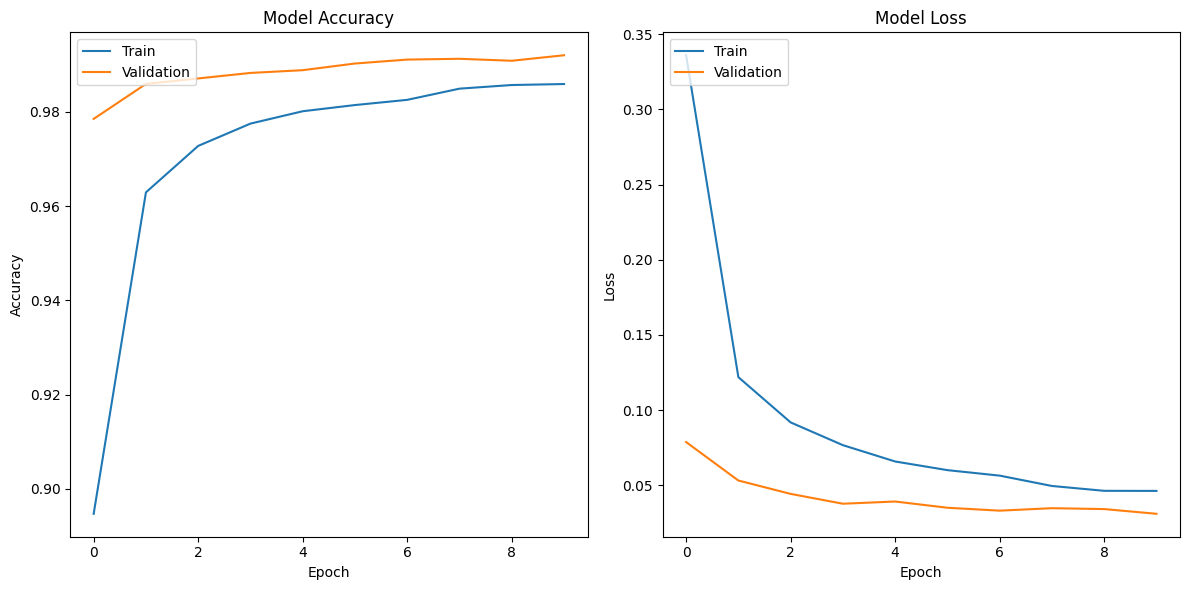

In [ ]:
import matplotlib.pyplot as plt

# Visualize the accuracy values for training and validation datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Display the loss values for both training and validation datasets
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Observations:

- Accuracy Plot: Both training and validation accuracy show a steady increase, suggesting effective learning by the model.
- Loss Plot: Training and validation loss consistently decrease, indicating the model's ability to generalize.

Signs of Overfitting or Underfitting:

- Overfitting: No clear signs of overfitting are observed, as the training and validation accuracy and loss closely align throughout the epochs.
- Underfitting: There is no evidence of underfitting; the model effectively captures underlying patterns in the data.

Possible Solutions:

- The inclusion of dropout layers in the model architecture serves as a regularization technique, preventing overfitting.
- Implementing early stopping based on validation loss could be considered to halt training when performance on the validation set plateaus.

Conclusion:

- The model achieves a test accuracy of 99.22%, demonstrating its effectiveness in classifying MNIST digits.
- The training and validation plots indicate a well-generalized model with minimal signs of overfitting or underfitting.
- Key contributors to success include convolutional layers for feature extraction, pooling for dimensionality reduction, and dropout for regularization.
- Continuous monitoring and potential hyperparameter adjustments can further enhance the model's performance.